# Assignment 2
### Due date: Monday, October 23, 2017

Name: Dong, Larry <br/>
Student ID: 260647775

The following code uses Python3. The file is written using the IPython Jupyter notebook.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
# initialization of data points
data_points = {0.001: {'sin': 0.001000, 'cos': 1.000000, 'cot': 1000.0},
              0.002: {'sin': 0.002000, 'cos': 0.999998, 'cot': 499.999},
              0.003: {'sin': 0.003000, 'cos': 0.999996, 'cot': 333.332},
              0.004: {'sin': 0.004000, 'cos': 0.999992, 'cot': 249.999},
              0.005: {'sin': 0.005000, 'cos': 0.999988, 'cot': 199.998},}

x_values = list(data_points.keys())

sines, cosines, cotans = [], [], []
for val in x_values:
    sines.append(data_points[val]['sin'])
    cosines.append(data_points[val]['cos'])
    cotans.append(data_points[val]['cot'])

def lagrange_interpolation(c_val, x_val, y_val):
    # want to approximate for point x = c_val
    def lagrange_term(x_j, c=c_val, x=x_val):
        term = []
        for x_i in x:
            if x_i != x_j:
                term.append((c - x_i)/(x_j - x_i))

        assert len(term) == len(x) - 1

        return np.prod(term)
    
    assert len(x_val) == len(y_val)
    
    lag_terms = np.array([lagrange_term(val) for val in x_val])
    
    return lag_terms@y_val

### 1 a), 1 b)

In [3]:
true_value = 1/(np.tan(0.0015))
print("Real value of cot(x) at x= 0.0015: ", true_value)
print("\na)")
print("Interpolating for cot(x) at x = 0.0015: ", lagrange_interpolation(0.0015, x_values, cotans))
print("Relative error: {}%".format(100*np.abs(true_value - lagrange_interpolation(0.0015, x_values, cotans))/true_value))
print("\nb)")
inter_sin_cos = lagrange_interpolation(0.0015, x_values, cosines)/lagrange_interpolation(0.0015, x_values, sines)
print("Interpolating for cos(x) and sin(x) at x = 0.0015: ", inter_sin_cos)
print("Relative error: {}%".format(100*np.abs(true_value - inter_sin_cos)/true_value))

Real value of cot(x) at x= 0.0015:  666.666166667

a)
Interpolating for cot(x) at x = 0.0015:  684.895328125
Relative error: 2.734376269543768%

b)
Interpolating for cos(x) and sin(x) at x = 0.0015:  666.6658125
Relative error: 5.312502863370956e-05%


### 1 b) (cont.)
As one can realize, the error is much lower when interpolating for $\sin(x)$ and $\cos(x)$ to calculate $\cot(x)$. The reason for this is because $\cot(x)$ grows very quickly as $x$ approaches $0$. Indeed, absolute errors of addition is also additive, hence computing $\cot(x)$ at $x=0.0001$ will induce a much larger error which will be additive for the the Lagrange interpolation of $\cot(x)$ by interpolating for $\cot(x)$. However, by interpolating for $\sin(x)$ and $\cos(x)$, only one division with a denominator near $0$ is made and at the very end of the computation, hence reducing the overall absolute error. This is why the answer obtained in b) is much more accurate than the one obtained in a).

### 2
See handwritten handout on which most derivations are explained.

In [4]:
from numpy.linalg import inv

h = 0.25
matrix_A = np.array([[4*h, h], [h, 4*h + h/2]])
b = np.array([3/h*(1-np.sqrt(2)/2) - 3/h*(np.sqrt(2)/2),
             3/h*(np.sqrt(2)/2-1) - 3/h*(1-np.sqrt(2)/2)])

b_sol = list(inv(matrix_A)@b) # assuming matrix_A is invertible, and computations on paper were correct

b_sol.insert(0, 0)
b_sol.insert(3, b_sol[2]/2)

In [5]:
d_sol = [0, np.sqrt(1/2), 1, np.sqrt(1/2)]
a_sol = [(b_sol[j+1] - b_sol[j])/(3*h) for j in range(3)]
c_sol = [(d_sol[j+1] - d_sol[j] - b_sol[j]*(h**2) - a_sol[j]*(h**3))/h for j in range(3)]

In [6]:
print("a_sol", a_sol)
print("b_sol", b_sol)
print("c_sol", c_sol)
print("d_sol", d_sol)

a_sol [-4.8119514091370297, -2.4499109461929431, 3.6309311776649866]
b_sol [0, -3.6089635568527725, -5.4463967664974797, -2.7231983832487399]
c_sol [3.1291740878172547, 2.2269331986040619, -0.036906882233501442]
d_sol [0, 0.70710678118654757, 1, 0.70710678118654757]


Note that we still need to solve for $a_3, c_3$. <br/>
$S_3(x_4) = S_3(1) = a_3h^3 + b_3h^2 + c_3h + d_3=0$ and <br/>
$c_3 = 3a_2 h^2 + 2b_2h+c_2$

In [7]:
# be careful not to run this more than once!
# otherwise append will occur twice
c_3 = 3*a_sol[2]*(h**2)+2*b_sol[2]*h+c_sol[2]
c_sol.append(c_3)

a_3 = (d_sol[3]-d_sol[2] - c_sol[2]*h - b_sol[2]*(h**2))/(h**3)
a_sol.append(a_3)

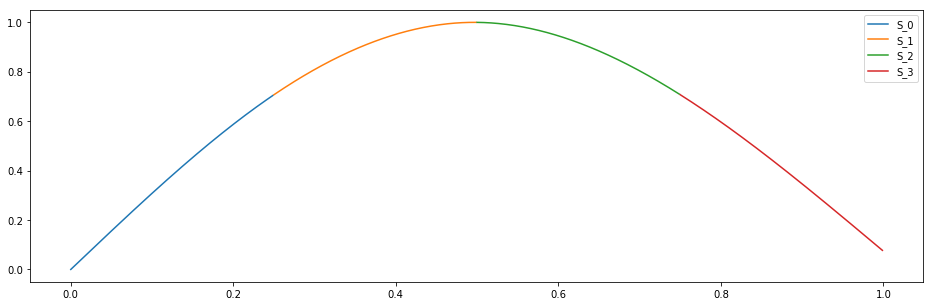

In [8]:
fig = plt.figure(figsize=(16, 5))
x_eval = np.linspace(0, 0.25, 200+1)
for i in range(4):
    x = np.linspace(0+h*i, 0.25+h*i, 200+1)
    y = list(map(lambda x: a_sol[i]*(x**3)+b_sol[i]*(x**2)+c_sol[i]*x+d_sol[i], x_eval[:-1]))
    plt.plot(x[:-1], y, label = ("S_" + str(i)))
    plt.legend()

In [9]:
print("Format: {}x**3 + {}x**2 + {}x + {}".format("a", "b", "c", "d"))
for i in range(4):
    print("S_{}(x) = {}(x-{})**3 + {}(x-{})**2 + {}(x-{}) + {}".format(i, np.around(a_sol[i], decimals=5), i*0.25, np.around(b_sol[i], decimals=5), i*0.25, np.around(c_sol[i], decimals=5), i*0.25, np.around(d_sol[i], decimals=5)))

Format: ax**3 + bx**2 + cx + d
S_0(x) = -4.81195(x-0.0)**3 + 0(x-0.0)**2 + 3.12917(x-0.0) + 0
S_1(x) = -2.44991(x-0.25)**3 + -3.60896(x-0.25)**2 + 2.22693(x-0.25) + 0.70711
S_2(x) = 3.63093(x-0.5)**3 + -5.4464(x-0.5)**2 + -0.03691(x-0.5) + 1
S_3(x) = 3.63093(x-0.75)**3 + -2.7232(x-0.75)**2 + -2.07931(x-0.75) + 0.70711


Hence, $f'(0.5) \approx S_2'(0.5) = c_2 = -0.03691$ and $f''(0.5) \approx S_2''(0.5) = 2b_2 = 2 \cdot -5.4464 = -10.9828$. Indeed, analytic values are: $f'(0.5) = \pi \cdot \cos(\pi\cdot 0.5)=0, \, f''(0.5) = \pi^2 \cdot (-\sin(\pi \cdot 0.5)) = -\pi^2 \approx 9.8696$. The errors of these values are as follows:

In [10]:
print("Absolute error of f'(0.5): {}".format(np.abs(c_sol[2])))
print("Absolute error of f''(0.5): {}".format(np.abs(-np.pi**2 - 2*b_sol[2])))
print("Relative error of f''(0.5): {}%".format(np.abs(-np.pi**2 - 2*b_sol[2])/(np.pi**2)*100))

Absolute error of f'(0.5): 0.03690688223350144
Absolute error of f''(0.5): 1.0231891319056015
Relative error of f''(0.5): 10.367073393465162%


Analytic value of area: $\int_0^1 \sin(\pi x) dx = \frac{-\cos(\pi x)}{\pi}|_{x=0}^{x=1}=\frac{2}{\pi}$ <br/>
Integral of spline over $[0, 1]$: let $h = 0.25$, the distance between two nodes, $\int_0^1 S(x)dx = \int_0^h S_0(x)dx + \int_h^{2h} S_1(x)dx + \int_{2h}^{3h} S_2(x)dx  + \int_{3h}^{4h}S_3(x)dx$. Indeed, $\int_{ih}^{(i+1)h} S_i(x)dx = \frac{a_i h^4}{4} + \frac{b_i h^3}{3} + \frac{c_i h^2}{2} + \frac{d_i h}{1}$:

In [11]:
area = 0
for i in range(4):
    area_temp = a_sol[i]*(h**4)/4 + b_sol[i]*(h**3)/3 + c_sol[i]*(h**2)/2 + d_sol[i]*h
    area += area_temp
    print("Area of S_{}(x) from {} to {}: {}".format(i, i*h, (i+1)*h, area_temp))
    
print("")
print("Total area of splines = ", area)
print("Exact area = ", 2/np.pi)
print("Absolute error = ", np.abs(area - 2/np.pi))
print("Relative error = ", np.abs(area - 2/np.pi)*np.pi*100/2, "%")

Area of S_0(x) from 0.0 to 0.25: 0.09308751894630383
Area of S_1(x) from 0.25 to 0.5: 0.22517918140268076
Area of S_2(x) from 0.5 to 0.75: 0.22402584133288383
Area of S_3(x) from 0.75 to 1.0: 0.10116089943488224

Total area of splines =  0.643453441117
Exact area =  0.6366197723675814
Absolute error =  0.00683366874917
Relative error =  1.07343017697 %
